# Encode reaction SMILES as drfp fingerprints

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from drfp import DrfpEncoder


Let's load some reaction SMILES provided in the example file `reaction_smiles.csv`.

In [20]:
smiles = []
with open("reaction_smiles.csv", "r") as f:
    smiles = [line.strip() for line in f]

print(f"{len(smiles)} reaction SMILES loaded. Here's an example:\n{smiles[0]}")

100 reaction SMILES loaded. Here's an example:
CO.O.O=C(NC(=S)Nc1nc(-c2ccccc2)cs1)c1ccccc1.[Na+].[OH-]>>NC(=S)Nc1nc(-c2ccccc2)cs1


Now encode using the `DrfpEncoder`:

In [21]:
fps, mapping = DrfpEncoder.encode_list(smiles, mapping=True, n_folded_length=128)
print(smiles[0])
print(np.nonzero(fps[0]))
print(smiles[2])
print(np.nonzero(fps[2]))

CO.O.O=C(NC(=S)Nc1nc(-c2ccccc2)cs1)c1ccccc1.[Na+].[OH-]>>NC(=S)Nc1nc(-c2ccccc2)cs1
(array([  6,   7,   8,  13,  25,  29,  35,  37,  40,  41,  43,  50,  55,
        61,  63,  67,  68,  73,  77,  87,  90, 100, 105, 108, 112, 113,
       116, 125]),)
CC(C)(C)[O-].[K+].CCOC(=O)CCCCCBr.CS(C)=O.c1ccc2c3c([nH]c2c1)CCCC3>>CCOC(=O)CCCCCn1c2c(c3ccccc31)CCCC2
(array([  0,   3,   7,   9,  11,  13,  19,  28,  29,  37,  38,  39,  42,
        50,  53,  56,  57,  58,  62,  65,  66,  68,  72,  74,  79,  82,
        86,  87,  88,  92,  94,  95,  96,  98,  99, 103, 104, 105, 107,
       109, 110, 111, 112, 113, 114, 122, 125, 127]),)


Let's have a look at the the n-grams generated from *all* encoded molecules:

There are 2610 unique molecular n-grams.


(array([ 2.,  2.,  9., 13., 16., 36., 20., 10., 11.,  9.]),
 array([ 8. , 10.2, 12.4, 14.6, 16.8, 19. , 21.2, 23.4, 25.6, 27.8, 30. ]),
 <BarContainer object of 10 artists>)

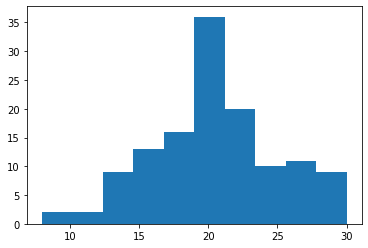

In [22]:
n_grams_per_bin = [len(value) for value in mapping.values()]
print(f"There are {sum(n_grams_per_bin)} unique molecular n-grams.")
plt.hist(n_grams_per_bin)

As we have chosen a dimensionality of 128, we have a lot of collisions when hashing the n-grams. However, we have shown that this isn't that big of an issue for classification tasks (see paper). But let's see what changes with different dimensions.

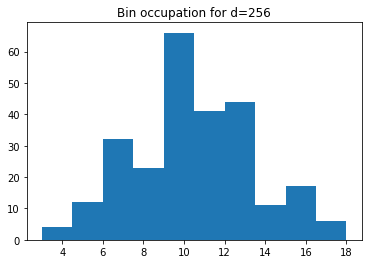

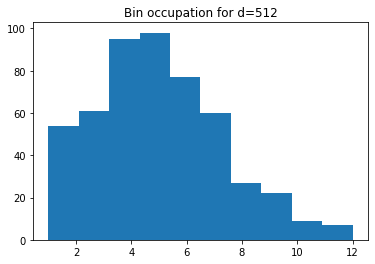

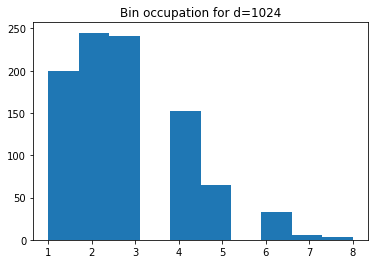

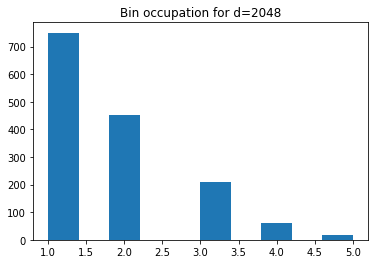

In [23]:
for d in [256, 512, 1024, 2048]:
    fps, mapping = DrfpEncoder.encode_list(smiles, mapping=True, n_folded_length=d)
    n_grams_per_bin = [len(value) for value in mapping.values()]
    plt.hist(n_grams_per_bin)
    plt.title(f"Bin occupation for d={d}")
    plt.show()

You can see where this is going... Now let's look at a few molecular n-grams:

In [24]:
ngrams = list(mapping[list(mapping.keys())[0]])
print(ngrams)
ngrams = list(mapping[list(mapping.keys())[1]])
print(ngrams)

['[CH2]([CH2][CH2][CH3])[CH2][C]([CH3])=[O]', '[C]([CH3])([CH3])([CH3])[C]([NH2])=[O]', '[C](=[S])([NH][CH3])[NH][cH3]']
['[cH]([cH][cH2])[c]([cH2])[CH3]']


Next, let's do a quick PCA of the data to see whether there is a pattern in our data...

Text(0.5, 1.0, 'PCA of 100 drfp-encoded reactions')

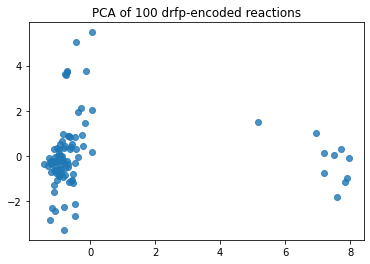

In [25]:
pca = PCA(n_components=2)
X = pca.fit(fps).transform(fps)

plt.scatter(X[:,0], X[:,1], alpha=0.8)
plt.title("PCA of 100 drfp-encoded reactions")

We can now see that 10 of the reactions are not like the others, and indeed, 90 reactions were randomly selected from the uspto data set, while 10 were randomly selected from a set containing only Suzuki-Miyaura reactions.